In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kkr-vs-kxip-match/deliveries.csv
/kaggle/input/kkr-vs-kxip-match/matches.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("../input/kkr-vs-kxip-match/deliveries.csv")
df.head()
df.info()
import os
print(os.listdir("../input"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [4]:
df1=pd.read_csv("../input/kkr-vs-kxip-match/matches.csv")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

# QUES 1

In [5]:
df2=df1[['id','team1','team2','winner','result','toss_winner','toss_decision','season',]]
df2.head()


,id,team1,team2,winner,result,toss_winner,toss_decision,season
0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,normal,Royal Challengers Bangalore,field,2017
1,2,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,normal,Rising Pune Supergiant,field,2017
2,3,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,normal,Kolkata Knight Riders,field,2017
3,4,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,normal,Kings XI Punjab,field,2017
4,5,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,normal,Royal Challengers Bangalore,bat,2017


In [6]:
df3 = df2[(df2['team1']=='Kings XI Punjab') & (df2['team2'] == 'Kolkata Knight Riders') | (df2['team1']=='Kolkata Knight Riders') & (df2['team2'] == 'Kings XI Punjab')]
df3



,id,team1,team2,winner,result,toss_winner,toss_decision,season
10,11,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,normal,Kolkata Knight Riders,field,2017
47,48,Kings XI Punjab,Kolkata Knight Riders,Kings XI Punjab,normal,Kolkata Knight Riders,field,2017
80,81,Kings XI Punjab,Kolkata Knight Riders,Kings XI Punjab,normal,Kings XI Punjab,bat,2008
111,112,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,normal,Kings XI Punjab,bat,2008
122,123,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,normal,Kolkata Knight Riders,field,2009
141,142,Kolkata Knight Riders,Kings XI Punjab,Kings XI Punjab,normal,Kolkata Knight Riders,bat,2009
195,196,Kolkata Knight Riders,Kings XI Punjab,Kolkata Knight Riders,normal,Kolkata Knight Riders,bat,2010
207,208,Kolkata Knight Riders,Kings XI Punjab,Kings XI Punjab,normal,Kolkata Knight Riders,bat,2010
269,270,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,normal,Kolkata Knight Riders,field,2011
324,325,Kings XI Punjab,Kolkata Knight Riders,Kings XI Punjab,normal,Kolkata Knight Riders,field,2012


In [7]:
df3['winner'].value_counts()


Kolkata Knight Riders    17
Kings XI Punjab           8
Name: winner, dtype: int64

In [8]:
total_matches=df3['id'].nunique()
total_matches

25

Text(0, 17, '17')

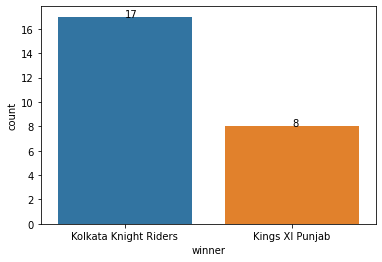

In [10]:
sns.countplot(df3['winner'])

plt.text(1,8,str(8))
plt.text(0,17,str(17))

In [11]:
df3['toss_decision'].value_counts()

field    17
bat       8
Name: toss_decision, dtype: int64

In [12]:
matches_played=pd.concat([df1['team1'],df1['team2']])
matches_played=matches_played.value_counts().reset_index()
matches_played.columns=['Team','Total Matches']
matches_played['wins']=df1['winner'].value_counts().reset_index()['winner']

matches_played.set_index('Team',inplace=True)
matches_played.reset_index().head(8)


,Team,Total Matches,wins
0,Mumbai Indians,187,109
1,Royal Challengers Bangalore,180,100
2,Kolkata Knight Riders,178,92
3,Delhi Capitals,177,84
4,Kings XI Punjab,176,82
5,Chennai Super Kings,164,77
6,Rajasthan Royals,147,75
7,Sunrisers Hyderabad,108,58


In [13]:
win_percentage = round(matches_played['wins']/matches_played['Total Matches'],3)*100
win_percentage.head(8)

Team
Mumbai Indians                 58.3
Royal Challengers Bangalore    55.6
Kolkata Knight Riders          51.7
Delhi Capitals                 47.5
Kings XI Punjab                46.6
Chennai Super Kings            47.0
Rajasthan Royals               51.0
Sunrisers Hyderabad            53.7
dtype: float64

In [14]:
total=df1.groupby('team1')['id'].count() + df1.groupby('team2')['id'].count()
total

team1
Chennai Super Kings            164
Deccan Chargers                 75
Delhi Capitals                 177
Gujarat Lions                   30
Kings XI Punjab                176
Kochi Tuskers Kerala            14
Kolkata Knight Riders          178
Mumbai Indians                 187
Pune Warriors                   46
Rajasthan Royals               147
Rising Pune Supergiant          16
Rising Pune Supergiants         14
Royal Challengers Bangalore    180
Sunrisers Hyderabad            108
Name: id, dtype: int64

Text(0.5, 1.0, 'WIN PERCENTAGE BY TEAMS')

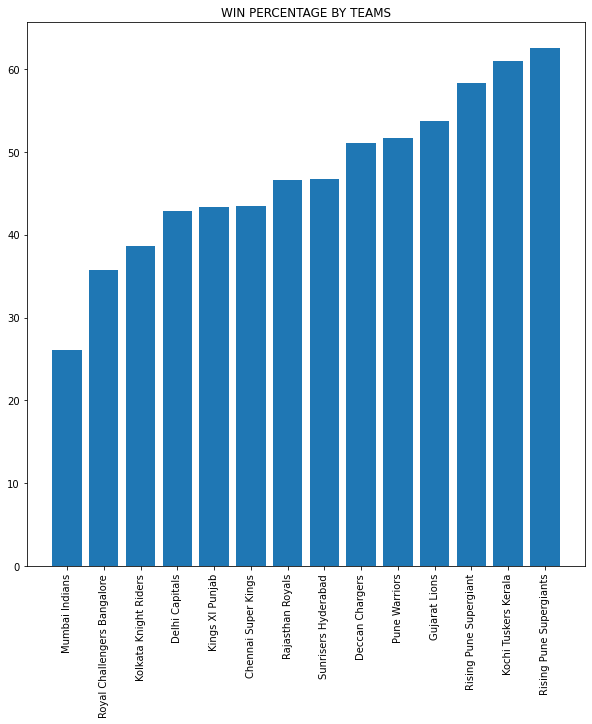

In [15]:
plt.figure(figsize=(10,10))
plt.bar(win_percentage.index,((df1['winner'].value_counts()/ total)*100).sort_values())
plt.xticks(rotation=90)
plt.title('WIN PERCENTAGE BY TEAMS')

In [16]:
last_3=df3[df3['season']>2016]
last_3['winner'].value_counts()

Kolkata Knight Riders    4
Kings XI Punjab          2
Name: winner, dtype: int64

Text(0, 4, '4')

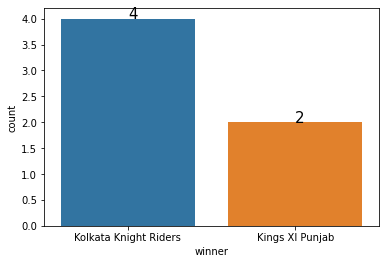

In [18]:
sns.countplot(last_3['winner'],data=last_3)
plt.text(1,2,str(2),fontsize=15)
plt.text(0,4,str(4),fontsize=15)

In [ ]:
#KKR has won matches against KXIP if we see the analysis of last 3 seasons and also overall wins(all seasons) are more for KKR.

# QUES 2

In [29]:
df4= df[['match_id','bowling_team','batting_team','total_runs','over','ball']]
df4=df4[(df4['batting_team']=='Kings XI Punjab') & (df4['bowling_team'] == 'Kolkata Knight Riders') | (df4['batting_team']=='Kolkata Knight Riders') & (df4['bowling_team'] == 'Kings XI Punjab')]
df4


,match_id,bowling_team,batting_team,total_runs,over,ball
2355,11,Kolkata Knight Riders,Kings XI Punjab,0,1,1
2356,11,Kolkata Knight Riders,Kings XI Punjab,4,1,2
2357,11,Kolkata Knight Riders,Kings XI Punjab,0,1,3
2358,11,Kolkata Knight Riders,Kings XI Punjab,2,1,4
2359,11,Kolkata Knight Riders,Kings XI Punjab,4,1,5
...,...,...,...,...,...,...
177164,11343,Kings XI Punjab,Kolkata Knight Riders,4,18,3
177165,11343,Kings XI Punjab,Kolkata Knight Riders,2,18,4
177166,11343,Kings XI Punjab,Kolkata Knight Riders,2,18,5
177167,11343,Kings XI Punjab,Kolkata Knight Riders,6,18,6


In [30]:
#To count number of dot balls, Assigning 1 to ball if total runs are 0 in the ball column in data frame df4
df4['ball'] = df4['total_runs'].apply(lambda x: 1  if x== 0 else 0)
df4


,match_id,bowling_team,batting_team,total_runs,over,ball
2355,11,Kolkata Knight Riders,Kings XI Punjab,0,1,1
2356,11,Kolkata Knight Riders,Kings XI Punjab,4,1,0
2357,11,Kolkata Knight Riders,Kings XI Punjab,0,1,1
2358,11,Kolkata Knight Riders,Kings XI Punjab,2,1,0
2359,11,Kolkata Knight Riders,Kings XI Punjab,4,1,0
...,...,...,...,...,...,...
177164,11343,Kings XI Punjab,Kolkata Knight Riders,4,18,0
177165,11343,Kings XI Punjab,Kolkata Knight Riders,2,18,0
177166,11343,Kings XI Punjab,Kolkata Knight Riders,2,18,0
177167,11343,Kings XI Punjab,Kolkata Knight Riders,6,18,0


In [33]:
dot_balls_by_teams=df4.groupby('bowling_team').agg({'ball':'sum'})
dot_balls_by_teams

,ball
bowling_team,
Kings XI Punjab,964
Kolkata Knight Riders,1037


In [34]:
# Total dot balls in KKR VS KXIP:
dot_balls_by_Kings_XI_Punjab_=964
dot_balls_by_Kolkata_Knight_Riders=1037

In [36]:
total_dot_balls=df4['ball'].sum()
total_dot_balls


2001

In [37]:
dot_balls_per_match=total_dot_balls/total_matches
dot_balls_per_match

80.04

In [ ]:
#Also considering the ground i.e Sharjah Cricket stadium(high scoring ground analysing the current scenerio IPL 2020).So Dot balls would be less as predicted above.So I will go for less than 60 dot balls.

# QUES 3

In [47]:
df5= df[['match_id','bowling_team','batting_team','player_dismissed','over','ball']]
df5=df5[(df5['batting_team']=='Kings XI Punjab') & (df5['bowling_team'] == 'Kolkata Knight Riders') | (df5['batting_team']=='Kolkata Knight Riders') & (df5['bowling_team'] == 'Kings XI Punjab')]
df5=df5[(df5['over'] >15)]
df5=df5.fillna(0)
df5

,match_id,bowling_team,batting_team,player_dismissed,over,ball
2453,11,Kolkata Knight Riders,Kings XI Punjab,0,16,1
2454,11,Kolkata Knight Riders,Kings XI Punjab,0,16,2
2455,11,Kolkata Knight Riders,Kings XI Punjab,0,16,3
2456,11,Kolkata Knight Riders,Kings XI Punjab,0,16,4
2457,11,Kolkata Knight Riders,Kings XI Punjab,0,16,5
...,...,...,...,...,...,...
177164,11343,Kings XI Punjab,Kolkata Knight Riders,0,18,3
177165,11343,Kings XI Punjab,Kolkata Knight Riders,0,18,4
177166,11343,Kings XI Punjab,Kolkata Knight Riders,0,18,5
177167,11343,Kings XI Punjab,Kolkata Knight Riders,0,18,6


In [48]:
df5['player_dismissed'] = df5['player_dismissed'].apply(lambda x: 'NO WICKET'  if x==0 else 'WICKET')
df5

,match_id,bowling_team,batting_team,player_dismissed,over,ball
2453,11,Kolkata Knight Riders,Kings XI Punjab,NO WICKET,16,1
2454,11,Kolkata Knight Riders,Kings XI Punjab,NO WICKET,16,2
2455,11,Kolkata Knight Riders,Kings XI Punjab,NO WICKET,16,3
2456,11,Kolkata Knight Riders,Kings XI Punjab,NO WICKET,16,4
2457,11,Kolkata Knight Riders,Kings XI Punjab,NO WICKET,16,5
...,...,...,...,...,...,...
177164,11343,Kings XI Punjab,Kolkata Knight Riders,NO WICKET,18,3
177165,11343,Kings XI Punjab,Kolkata Knight Riders,NO WICKET,18,4
177166,11343,Kings XI Punjab,Kolkata Knight Riders,NO WICKET,18,5
177167,11343,Kings XI Punjab,Kolkata Knight Riders,NO WICKET,18,6


In [50]:
df5['player_dismissed'].value_counts()

NO WICKET    1237
WICKET        105
Name: player_dismissed, dtype: int64

In [52]:
#from above
Wickets_fallen=105
Wickets_per_match=Wickets_fallen/total_matches
Wickets_per_match

4.2

In [ ]:
# 4 wickets to be fall according to the analysis above...

# QUES 4

In [54]:
df6= df[['match_id','bowling_team','batsman','batsman_runs']]
df6=df6[(df6['batsman'] == 'GJ Maxwell') & (df6['bowling_team'] == 'Kolkata Knight Riders')]
df6

,match_id,bowling_team,batsman,batsman_runs
2407,11,Kolkata Knight Riders,GJ Maxwell,1
2409,11,Kolkata Knight Riders,GJ Maxwell,0
2410,11,Kolkata Knight Riders,GJ Maxwell,4
2411,11,Kolkata Knight Riders,GJ Maxwell,1
2414,11,Kolkata Knight Riders,GJ Maxwell,1
...,...,...,...,...
156484,7919,Kolkata Knight Riders,GJ Maxwell,6
156485,7919,Kolkata Knight Riders,GJ Maxwell,0
156486,7919,Kolkata Knight Riders,GJ Maxwell,0
156487,7919,Kolkata Knight Riders,GJ Maxwell,0


In [55]:
total_runs_maxwell_vsKKR=df6["batsman_runs"].sum()
total_runs_maxwell_vsKKR

330

In [56]:
df7= df[['match_id','bowling_team','batting_team','total_runs','extra_runs']]
df7=df7[(df7['batting_team'] == 'Kings XI Punjab') & (df7['bowling_team'] == 'Kolkata Knight Riders')]
df7

,match_id,bowling_team,batting_team,total_runs,extra_runs
2355,11,Kolkata Knight Riders,Kings XI Punjab,0,0
2356,11,Kolkata Knight Riders,Kings XI Punjab,4,0
2357,11,Kolkata Knight Riders,Kings XI Punjab,0,0
2358,11,Kolkata Knight Riders,Kings XI Punjab,2,0
2359,11,Kolkata Knight Riders,Kings XI Punjab,4,0
...,...,...,...,...,...
177051,11343,Kolkata Knight Riders,Kings XI Punjab,2,0
177052,11343,Kolkata Knight Riders,Kings XI Punjab,4,0
177053,11343,Kolkata Knight Riders,Kings XI Punjab,6,0
177054,11343,Kolkata Knight Riders,Kings XI Punjab,4,0


In [58]:
total_runs_for_KXIP_vsKKR=df7["total_runs"].sum()
total_runs_for_KXIP_vsKKR

4011

In [59]:
maxwell_contribution=(total_runs_maxwell_vsKKR/total_runs_for_KXIP_vsKKR)*100
maxwell_contribution

8.227374719521316

# QUES 5

In [62]:
df8= df[['bowling_team','batting_team','noball_runs']]
df8=df8[(df8['batting_team']=='Kings XI Punjab') & (df8['bowling_team'] == 'Kolkata Knight Riders') | (df8['batting_team']=='Kolkata Knight Riders') & (df8['bowling_team'] == 'Kings XI Punjab')]
df8=df8[(df8['noball_runs']==1)]
df8

,bowling_team,batting_team,noball_runs
2442,Kolkata Knight Riders,Kings XI Punjab,1
2443,Kolkata Knight Riders,Kings XI Punjab,1
18963,Kolkata Knight Riders,Kings XI Punjab,1
46043,Kings XI Punjab,Kolkata Knight Riders,1
46074,Kings XI Punjab,Kolkata Knight Riders,1
49006,Kings XI Punjab,Kolkata Knight Riders,1
98438,Kings XI Punjab,Kolkata Knight Riders,1
111713,Kolkata Knight Riders,Kings XI Punjab,1
122560,Kolkata Knight Riders,Kings XI Punjab,1
154508,Kings XI Punjab,Kolkata Knight Riders,1


In [65]:
df9=df8.groupby('bowling_team').agg({'noball_runs':'sum'})
df9


,noball_runs
bowling_team,
Kings XI Punjab,6
Kolkata Knight Riders,5


In [64]:
total_noball=df8['noball_runs'].value_counts()
total_noball

1    11
Name: noball_runs, dtype: int64

In [66]:
noball_per_match=total_noball/total_matches
noball_per_match

1    0.44
Name: noball_runs, dtype: float64

In [ ]:
#Ans=(0-1)NO ball